<a href="https://colab.research.google.com/github/mars241/CheckPoints/blob/main/Corr_LiveCoding_by_Vincent_VOINEAU_(Multinomial)_Naive_Bayes_Algorithms%2C_CV_et_Grid_search_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Multinomial Naive Bayes` est un algorithme de classification basé sur le théorème de probabilité de Bayes.


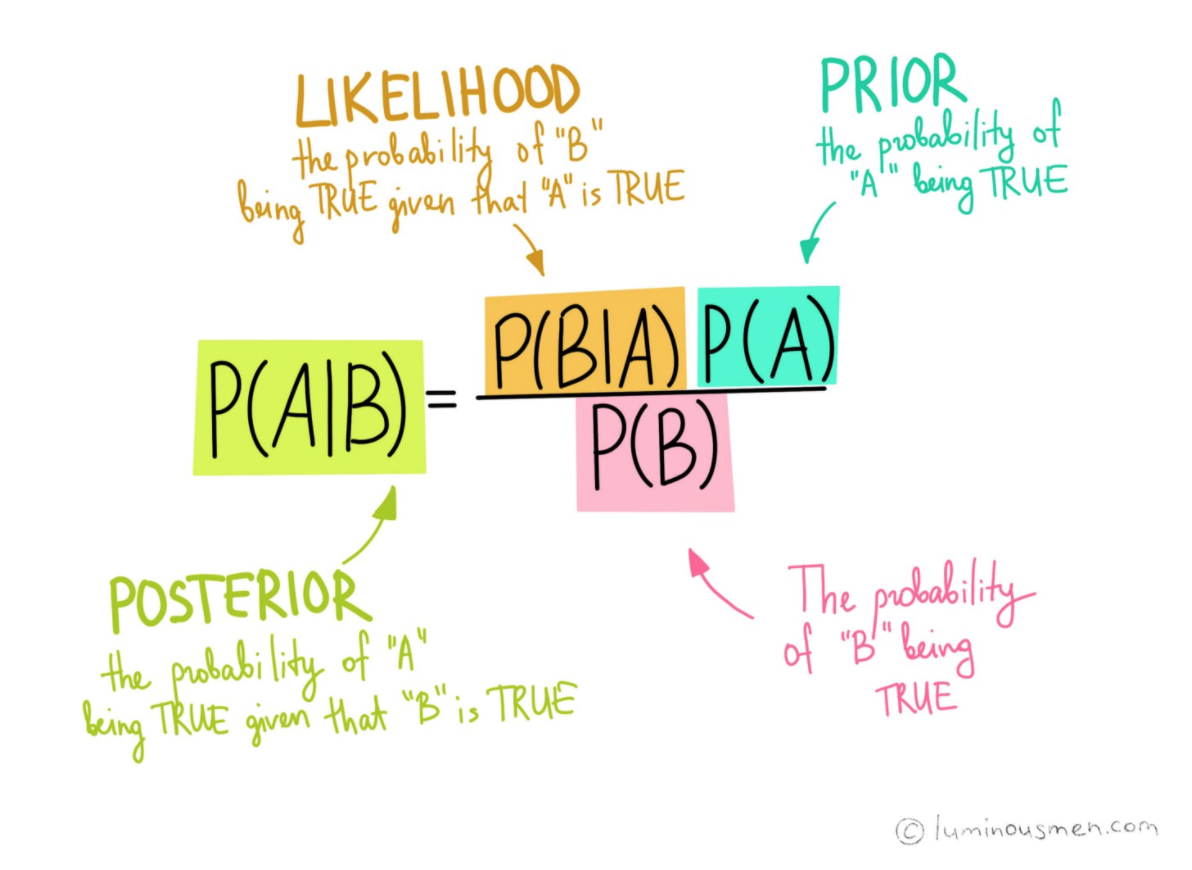

Voyons un exemple ensemble:

On aimerait classifier des mails, en fonction de leur contenu.  
Soit ce sont des mails "normaux", soit ce sont des "spams".

#### 1.On commence par compter l'occurrence de chaque mot dans un mail "normal":

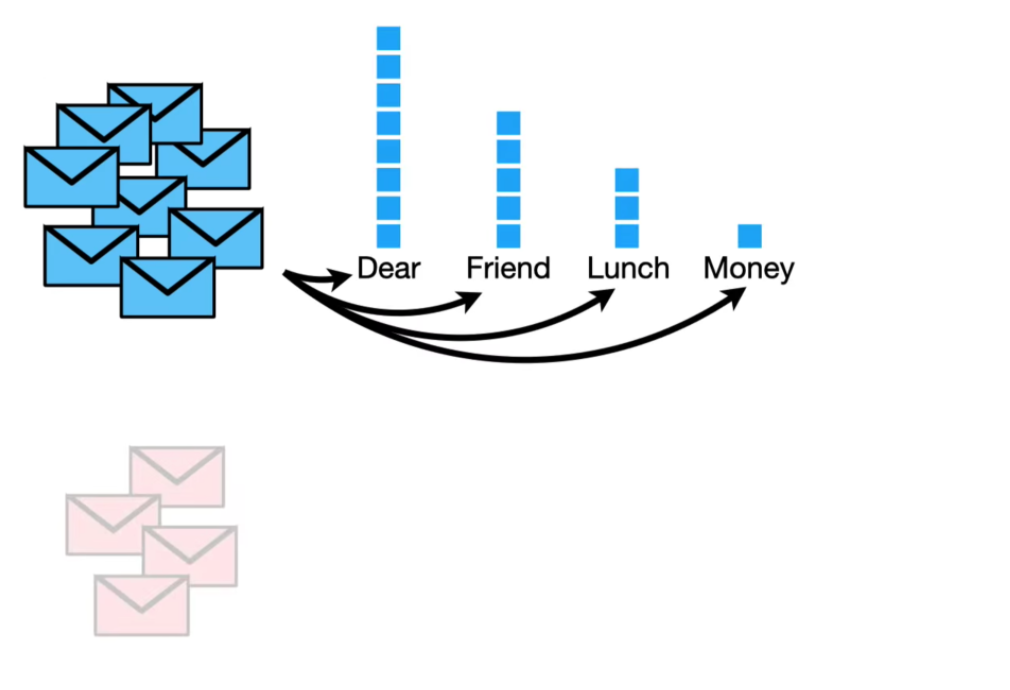

### 2. On calcule la probabilité pour chaque mot qui se trouve dans le mail "normal".


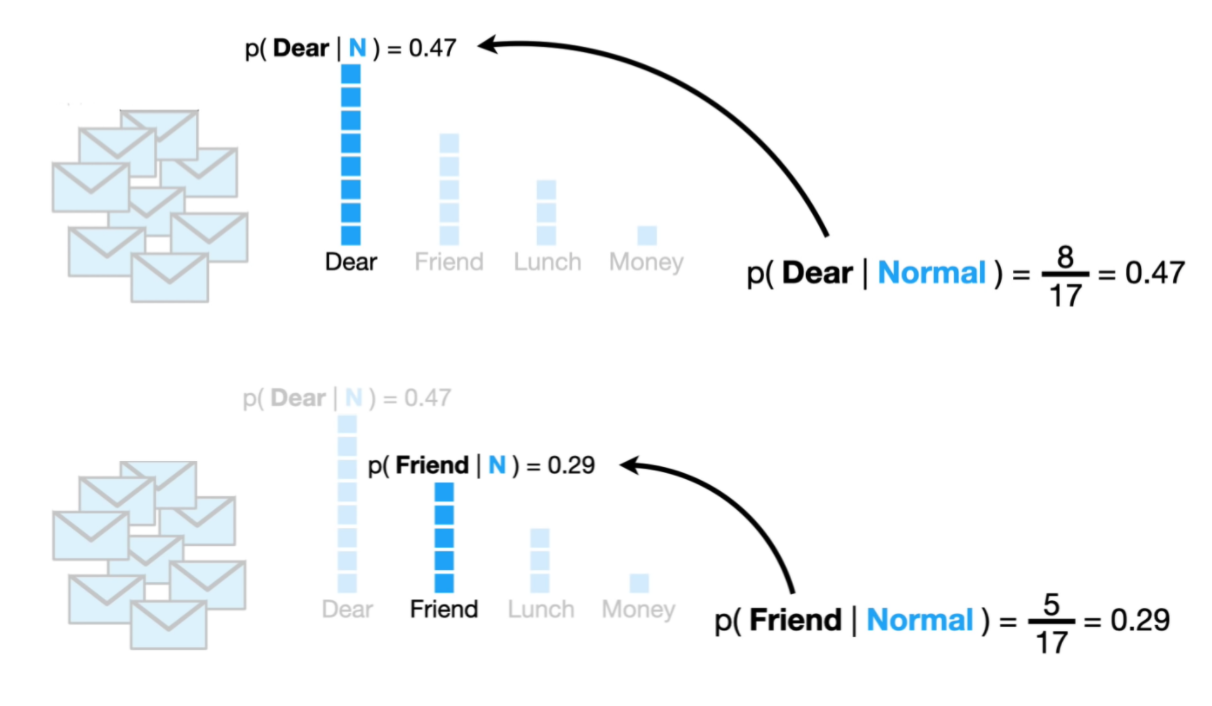

### 3. On réalise le même procédé avec les mails qui sont des "spams".

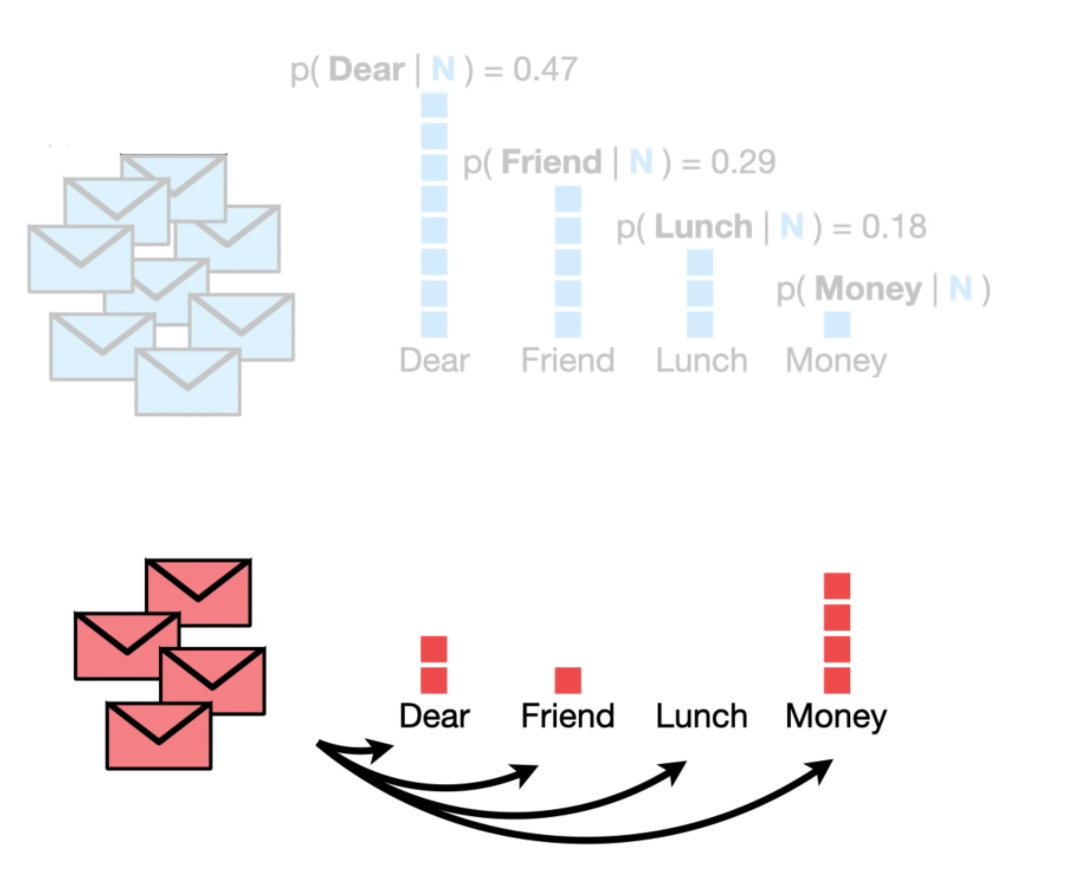

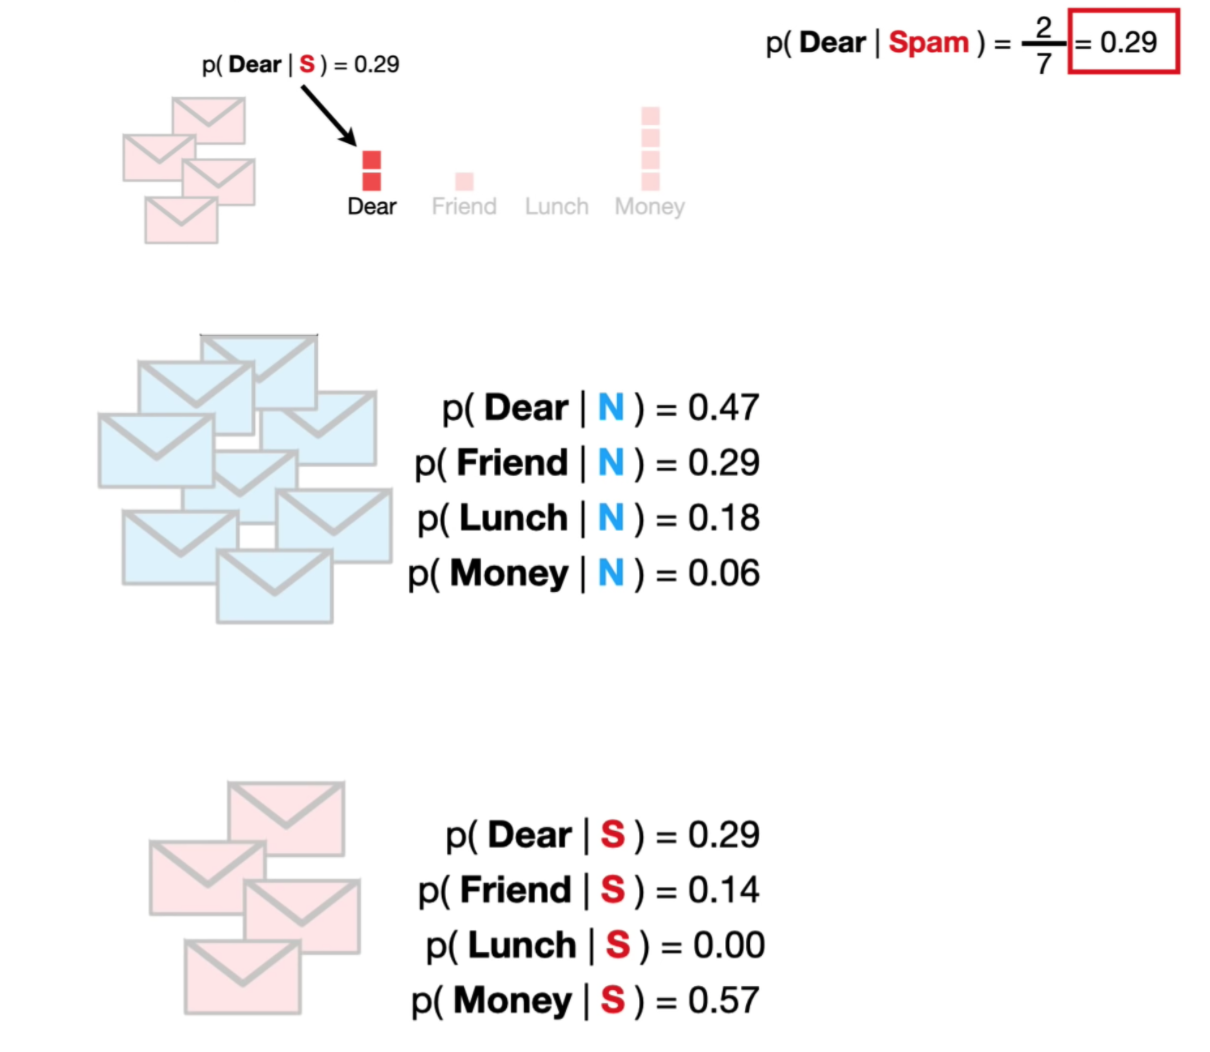

## Est-ce qu'un mail qui contient "Dear friend" sera considéré comme normal ou comme spam ?

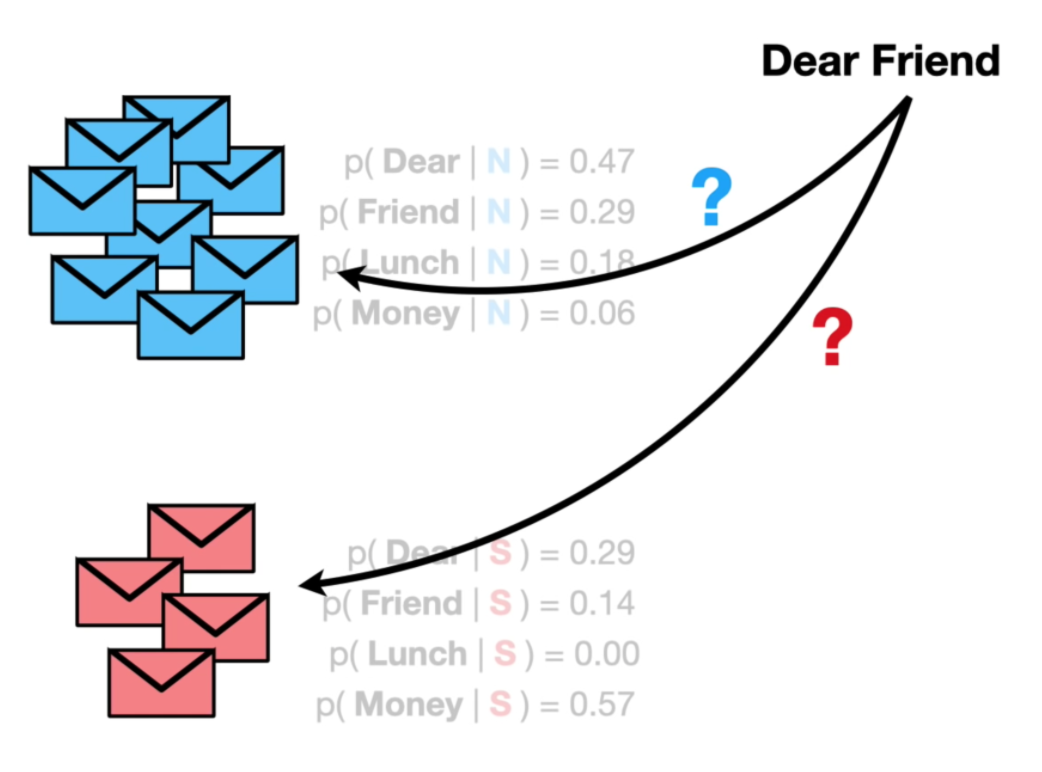

### 4. Pour répondre à cette question, on calcule la probabilité a priori (prior) que le mail soit normal.
C'est à dire, dans notre exemple, le nombre de mails normal divisé par le nombre total de mails.

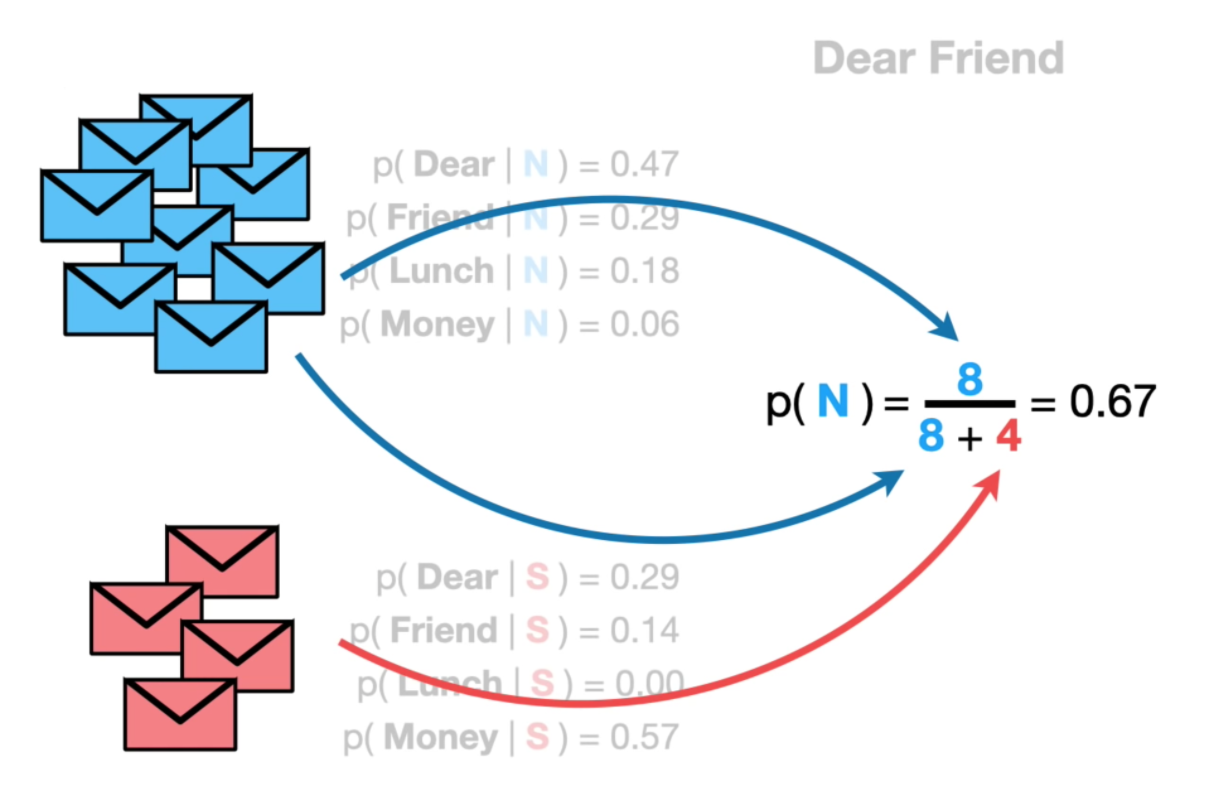

### 4bis. On Calcule la probabilité que le mail soit "normal"



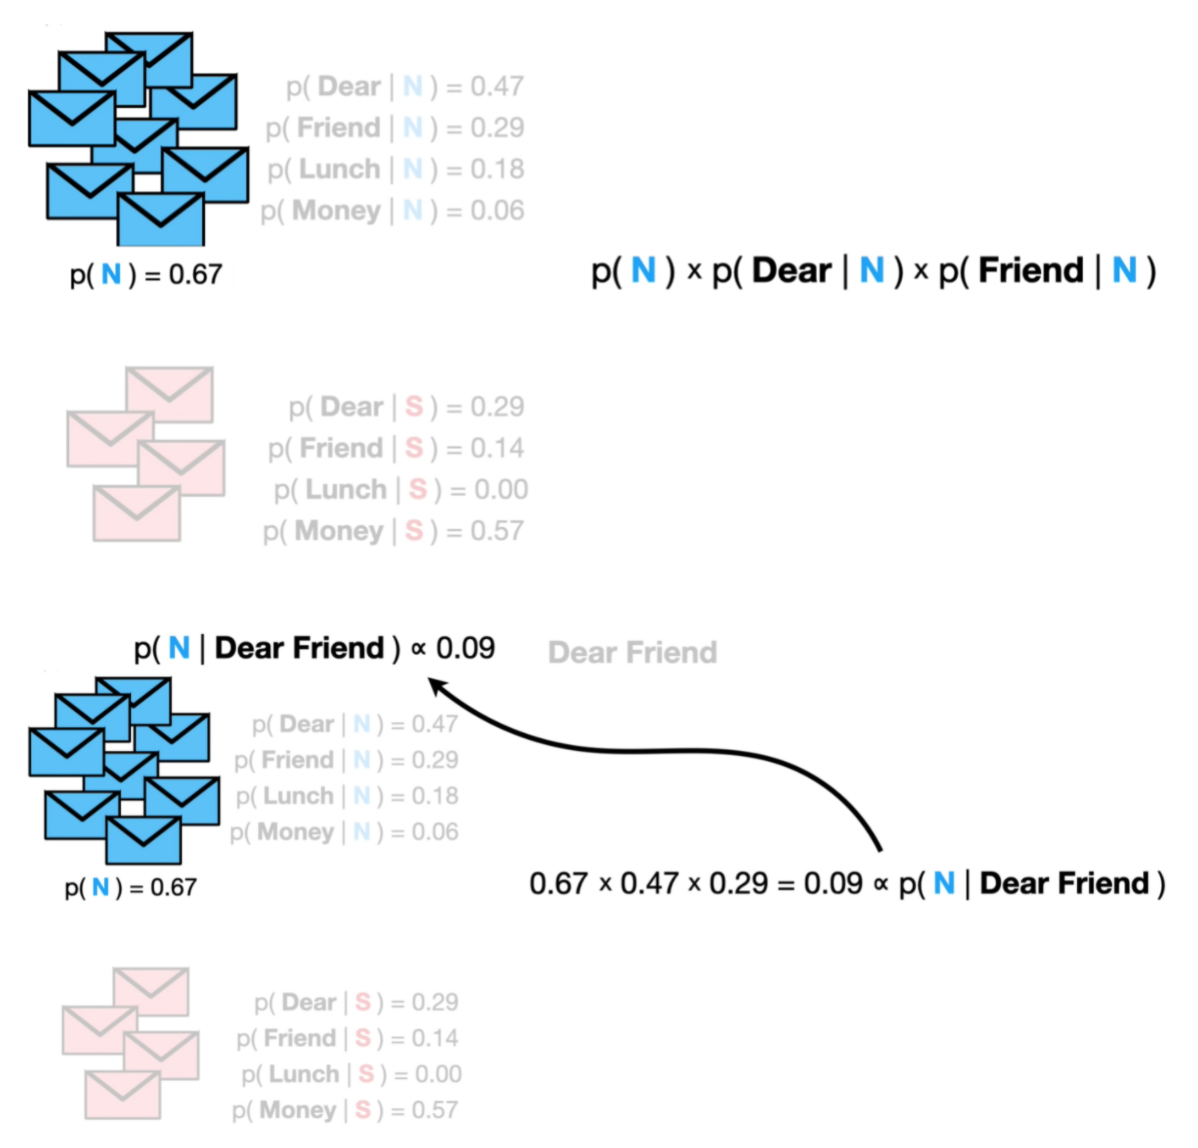

### 5. On Calcule la probabilité que le mail soit un "spam"
On répète les étapes 4 et 4bis pour les mails "spam" cette fois.

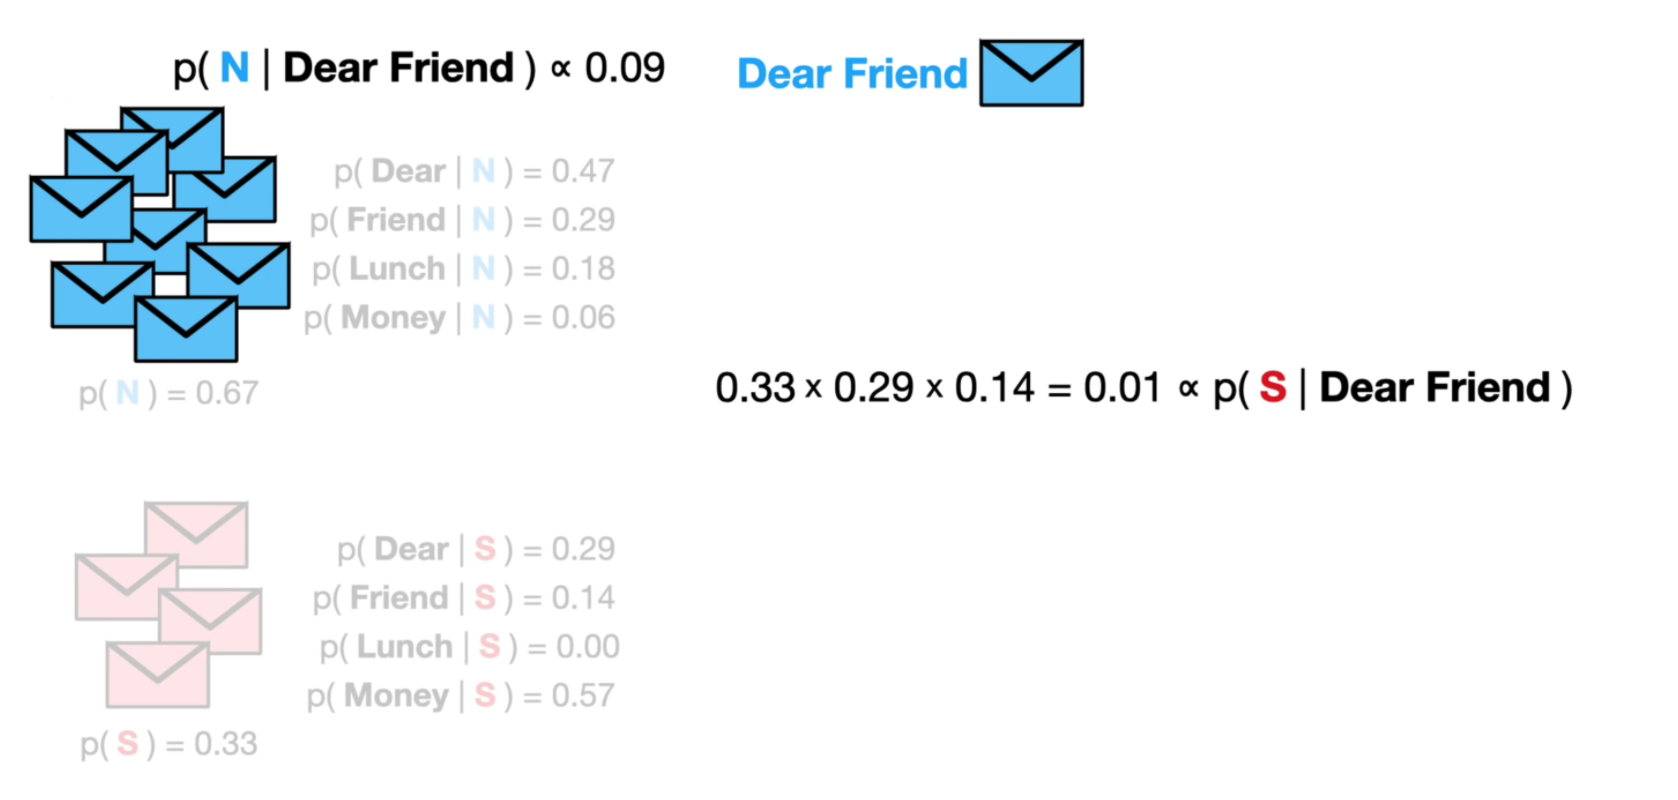

La prédiction se fera en fonction de la plus grande probabilité.
"Dear Friend" sera considéré comme un ensemble dans qui apparaît dans un mail "normal".

### Dans le cas où on a une probabilité égale à 0, on a un problème...

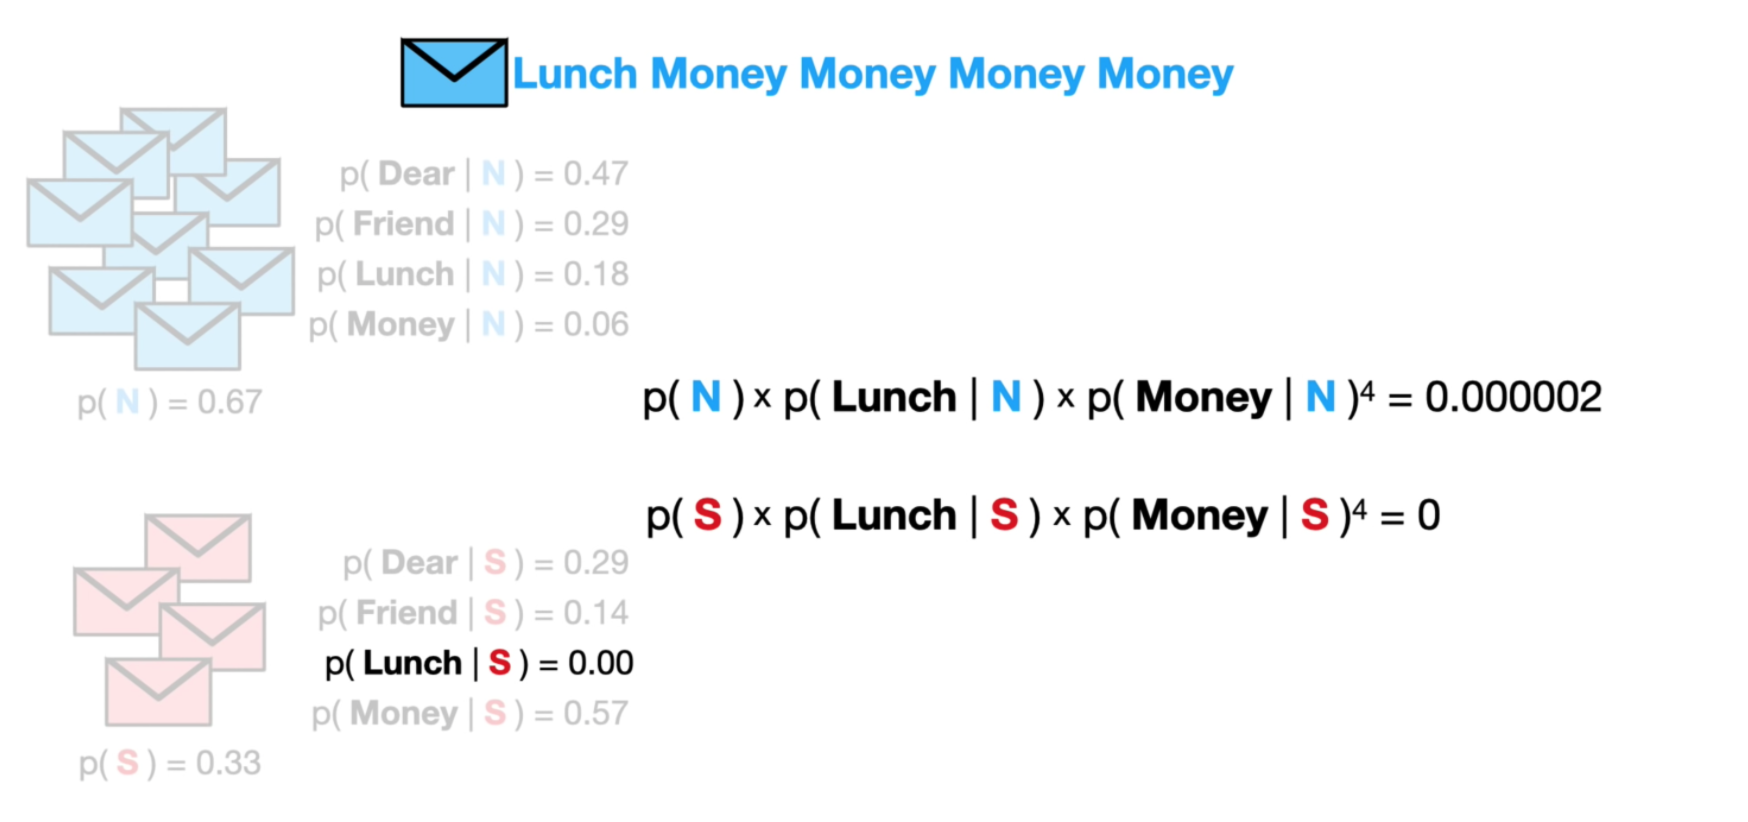

Pour résoudre ce problème, l'algorithme `Multinomial Naive Base` intègre le `Smoothing`

# Le Smoothing

Le `Smoothing` (lissage) consiste à ajouter +1 à chaque caractéristique (mot) pour éviter les comptes nuls. Le paramètre de lissage est le plus souvent appelé Alpha.

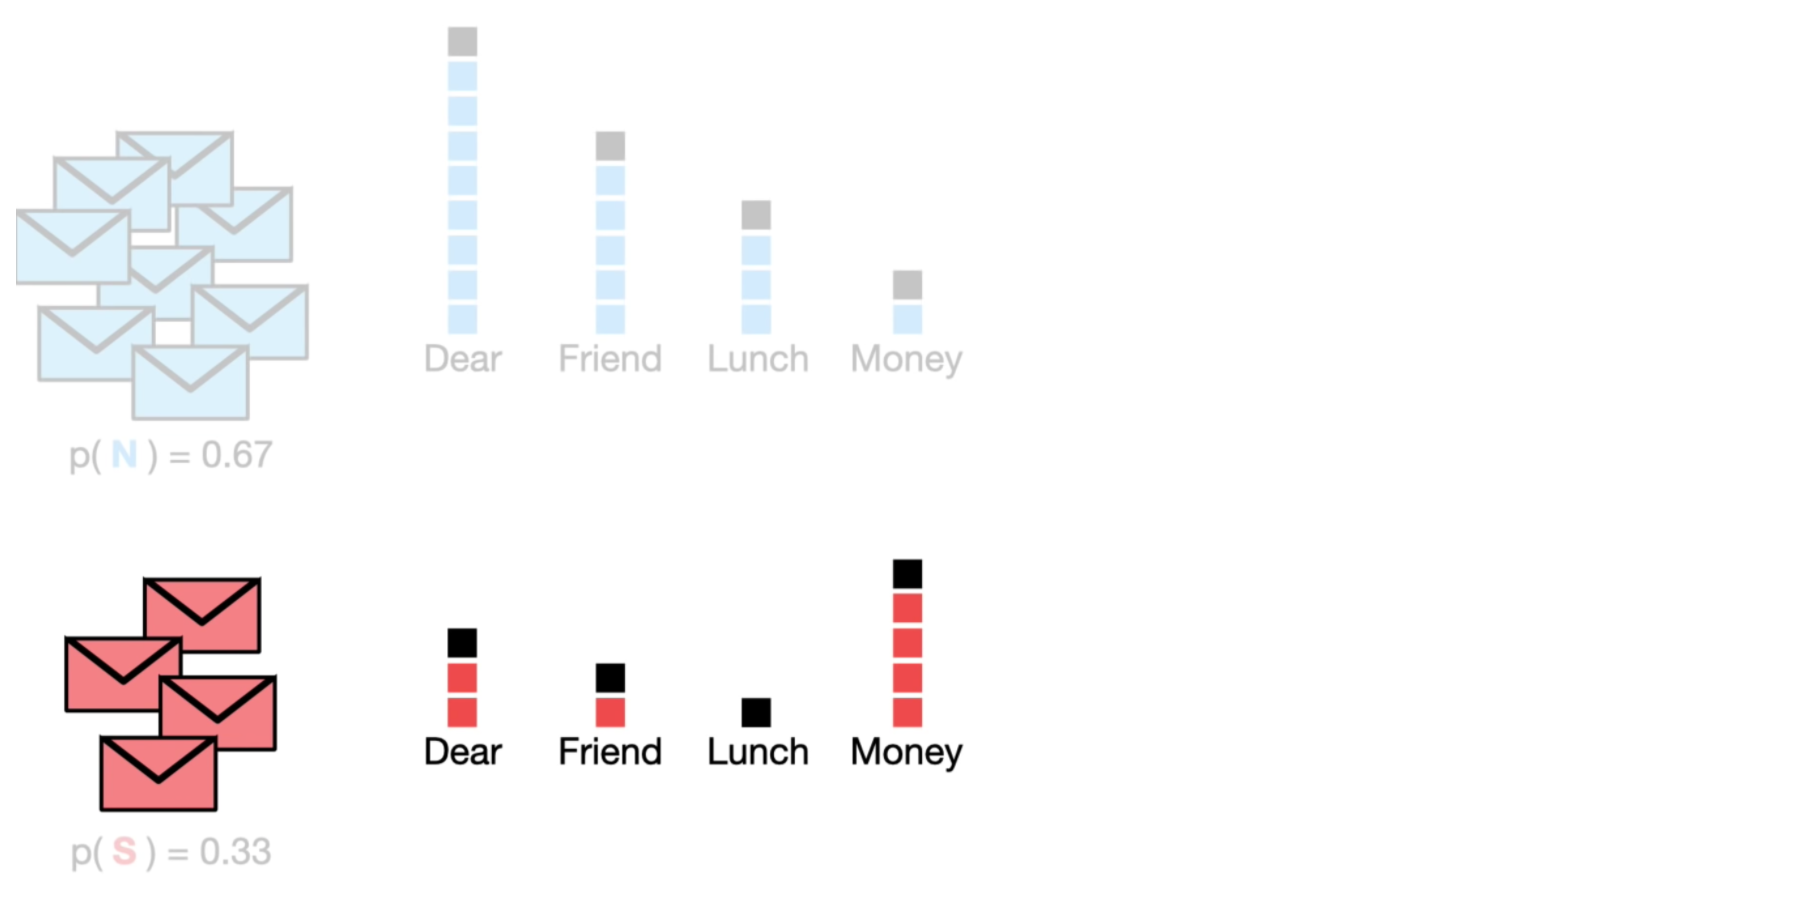

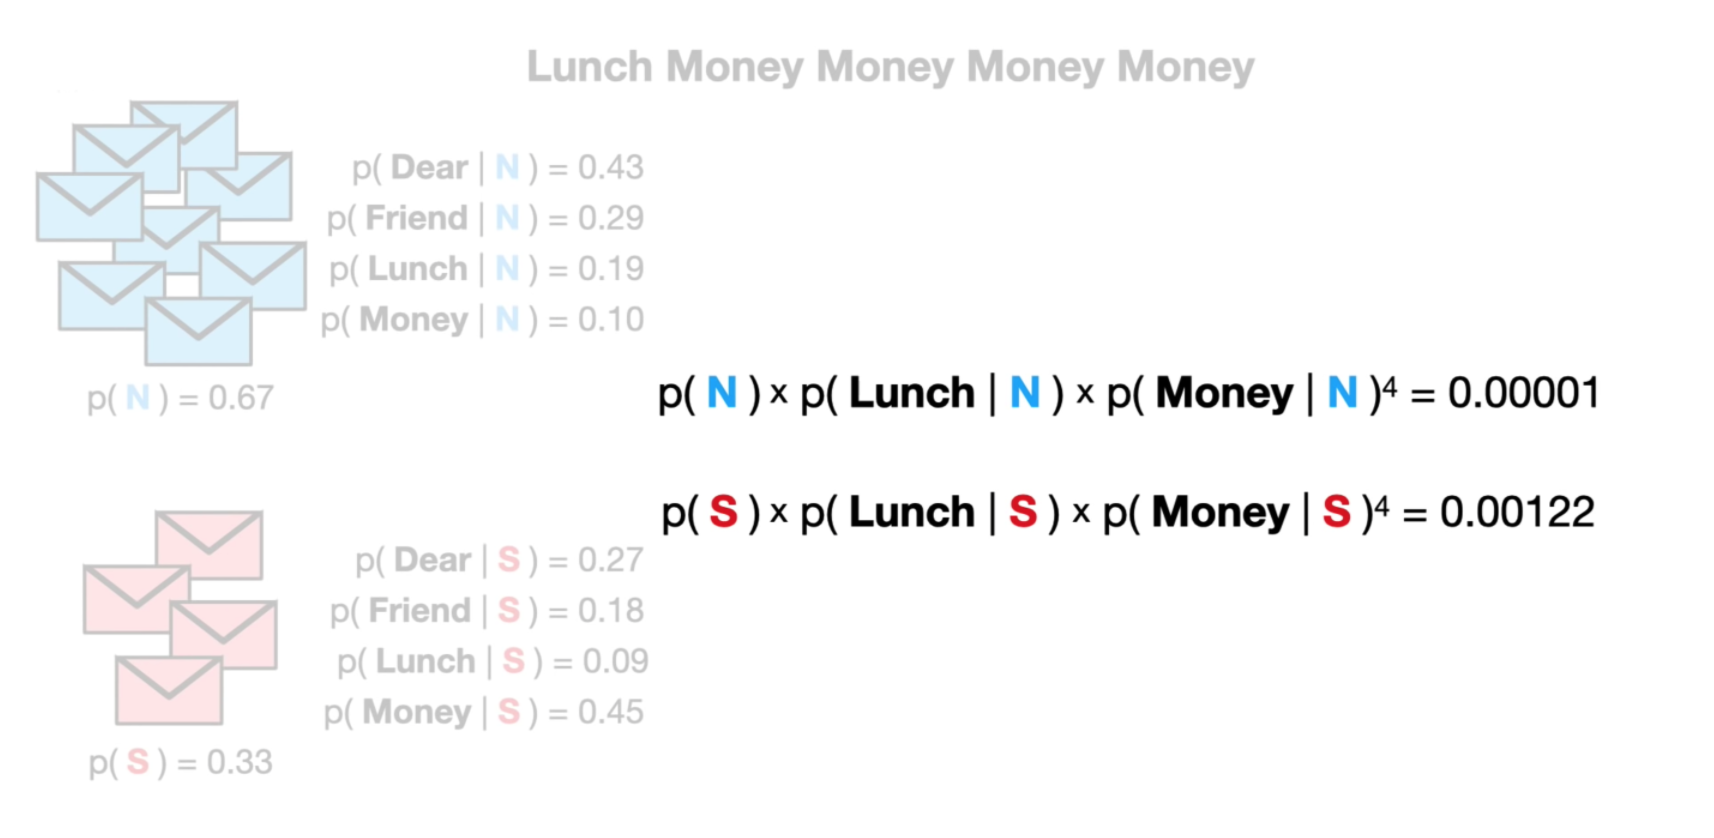

Dans `Naive Base`, il y a "naïf".
"Naïf" fait référence au fait que chaque caractéristique (mot) est traitée individuellement et que l'ordre n'est pas pris en compte.

👍 Avantages de l'algorithme Naive Bayes :

* Facile à mettre en œuvre.
* Probabilités de résultats
* Rapide
* Fonctionne particulièrement bien sur les données textuelles car gère les grandes dimensions.


# Implémentation du modèle pour un cas concret

On considère le jeu de données suivant:

In [ ]:
#from google.colab import files
#files.upload()


Le Dataset est composé d'emails qui sont classés comme ham (normal) [0] ou spam [1].  
Il faut nettoyer le jeu de données avant d'entraîner un modèle de prédiction.

In [ ]:
import pandas as pd

df = pd.read_csv('emails.csv')

In [ ]:
df

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]

In [ ]:
df.iloc[0]['text']

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

# Preprocessing



Avant d'entraîner un algorithme, des étapes de nettoyage sont nécéssaires.

## Enlever la Ponctuation

👇 Créons une fonction pour supprimer la ponctuation. Appliquons-la à `text` et ajoutons la sortie comme une nouvelle colonne dans le dataframe appelée `clean_text`.

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

df['clean_text'] = df.text.apply(remove_punctuation)

df.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  Subject  naturally irresistible your corporate...  
1  Subject  the stock trading gunslinger  fanny i...  
2  Subject  unbelievable new homes made easy  im ...  
3  Subject  4 color printing special  request add...  
4  Subject  do not have money   get software cds ...

## Lower Case

On doit avoir tout les caractéres en minuscule.

👇 Créons une fonction pour mettre le texte en minuscule. Appliquons-la à `clean_text`.

In [ ]:
def lowercase (text):
    lowercased = text.lower()
    return lowercased

df['clean_text'] = df.clean_text.apply(lowercase)

df.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  subject  naturally irresistible your corporate...  
1  subject  the stock trading gunslinger  fanny i...  
2  subject  unbelievable new homes made easy  im ...  
3  subject  4 color printing special  request add...  
4  subject  do not have money   get software cds ...

## Retirer les nombres

On doit maintenant retirer les nombres, car on ne souhaite pas les interpréter ici.

👇 Créons une fonction pour supprimer les chiffres du texte. Appliquons-la à `clean_text`.

In [ ]:
def remove_numbers (text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

df['clean_text'] = df.clean_text.apply(remove_numbers)

df.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  subject  naturally irresistible your corporate...  
1  subject  the stock trading gunslinger  fanny i...  
2  subject  unbelievable new homes made easy  im ...  
3  subject   color printing special  request addi...  
4  subject  do not have money   get software cds ...

## `StopWords`

On va maintenant retirer les `stopwords`.

👇 Créeons une fonction pour supprimer les mots-clés du texte. Appliquons-la à `clean_text`.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

df['clean_text'] = df.clean_text.apply(remove_stopwords)

df.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  [subject, naturally, irresistible, corporate, ...  
1  [subject, stock, trading, gunslinger, fanny, m...  
2  [subject, unbelievable, new, homes, made, easy...  
3  [subject, color, printing, special, request, a...  
4  [subject, money, get, software, cds, software,...

## Lemmatize

👇 Créons une fonction pour "lemmatiser"le texte.
Il s'agit de récupérer la racine des mots, pour que les mots ayant une racine identique ne soient pas considérés comme différent.  
Assurons-nous que la sortie est une chaîne unique, et non une liste de mots. Appliquons la fonction à "clean_text".

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

df['clean_text'] = df.clean_text.apply(lemma)


df.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  subject naturally irresistible corporate ident...  
1  subject stock trading gunslinger fanny merrill...  
2  subject unbelievable new home made easy im wan...  
3  subject color printing special request additio...  
4  subject money get software cd software compati...

## Modélisation `Bag-of-words`

👇 Il faut Vectoriser le `clean_text` en une représentation de type "Bag-of-Words" avec un `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(df.clean_text)

Voici notre DataFrame X_bow, qui contient le nombre d'occurrence des 30_933 mots considérés, pour chaque mail.

In [ ]:
pd.DataFrame(X_bow.toarray(),columns = vectorizer.get_feature_names())

C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaa  aaaenerfax  aadedeji  aagrawal  aal  aaldous  aaliyah  aall  \
0      0    0           0         0         0    0        0        0     0   
1      0    0           0         0         0    0        0        0     0   
2      0    0           0         0         0    0        0        0     0   
3      0    0           0         0         0    0        0        0     0   
4      0    0           0         0         0    0        0        0     0   
...   ..  ...         ...       ...       ...  ...      ...      ...   ...   
5723   0    0           0         0         0    0        0        0     0   
5724   0    0           0         0         0    0        0        0     0   
5725   0    0           0         0         0    0        0        0     0   
5726   0    0           0         0         0    0        0        0     0   
5727   0    0           0         0         0    0        0        0     0   

      aanalysis  ...  zwzm  zxghlajf  zyban  zyc  zygoma  zymg  zzmacmac  zzn  \
0             0  ...     0         0      0    0       0     0         0    0   
1             0  ...     0         0      0    0       0     0         0    0   
2             0  ...     0         0      0    0       0     0         0    0   
3             0  ...     0         0      0    0       0     0         0    0   
4             0  ...     0         0      0    0       0     0         0    0   
...         ...  ...   ...       ...    ...  ...     ...   ...       ...  ...   
5723          0  ...     0         0      0    0       0     0         0    0   
5724          0  ...     0         0      0    0       0     0         0    0   
5725          0  ...     0         0      0    0       0     0         0    0   
5726          0  ...     0         0      0    0       0     0         0    0   
5727          0  ...     0         0      0    0       0     0         0    0   

      zzncacst  zzzz  
0            0     0  
1            0     0  
2            0     0  
3            0     0  
4            0     0  
...        ...   ...  
5723         0     0  
5724         0     0  
5725         0     0  
5726         0     0  
5727         0     0  

[5728 rows x 30933 columns]

👇 Faisons un `cross_validate` d'un modèle `MultinomialNB` avec le "bag of words".
Évaluons la précision du modèle hypothétique

In [ ]:
X_bow.shape

(5728, 30933)

In [ ]:
df["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

cv_nb = cross_validate( MultinomialNB(), X_bow, df["spam"], scoring = "accuracy")

cv_nb['test_score'].mean()

0.9895252901681946

Le modèle à une `accuracy` quasiment parfaite.

### test de cv et grid search séparement

In [ ]:
#import des librairies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# CV avec le modele random forest Classifier
testRF = cross_validate( RandomForestClassifier(), X_bow, df["spam"], scoring = "accuracy")
testRF['test_score'].mean()

0.979924552458904

In [ ]:
#test plus "classique" avec le modèle random forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X_bow, df["spam"], test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#paramètres de basses
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred_test = clf.predict(X_test)
pred_train=clf.predict(X_train)

# View accuracy score
accuracy_score(y_test, y_pred_test)

print ('accuracy_score:', accuracy_score(y_test, y_pred_test))

accuracy_score: 0.974694589877836


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[856,   0],
       [ 29, 261]], dtype=int64)

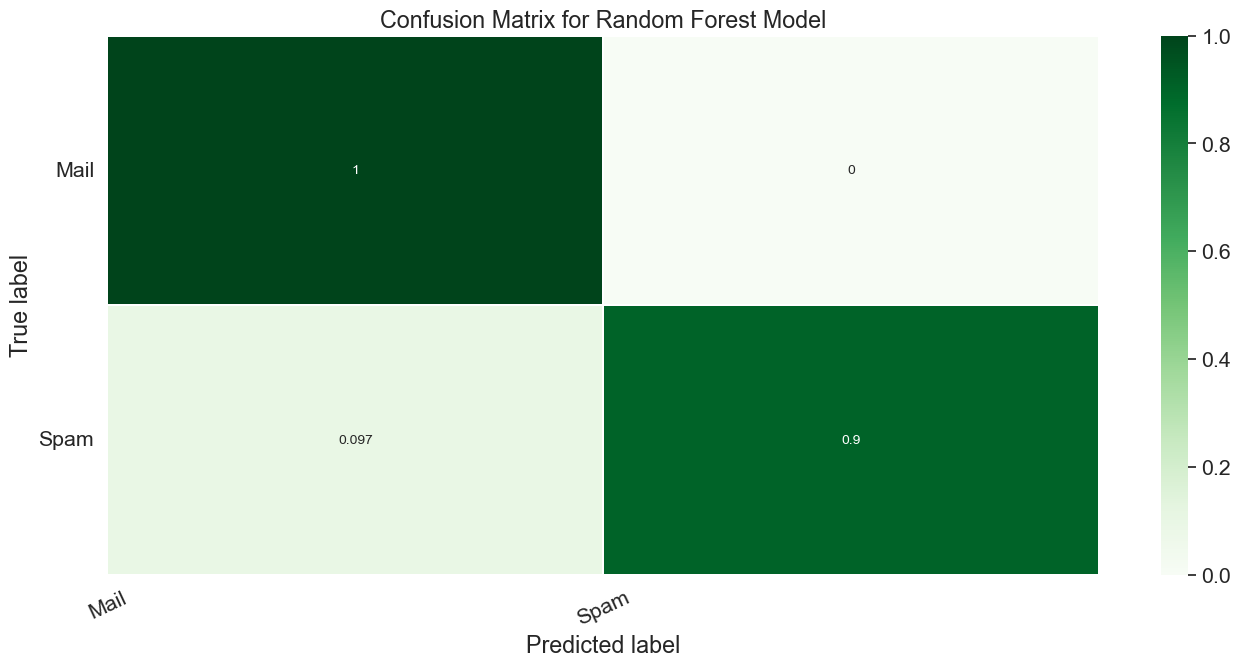

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Mail', 'Spam']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Test Grid search avec random forest  Classifier:

In [ ]:
model = RandomForestClassifier()
params = [{'n_estimators': [50,100,200],'max_features': ['auto', 'sqrt'],'max_depth' : [6,8,10,12],'criterion' :['gini', 'entropy']}]
GSCV = GridSearchCV(model,params,scoring="accuracy")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model = GSCV.best_estimator_

In [ ]:
best_model

RandomForestClassifier(max_depth=12, n_estimators=200)

In [ ]:
y_pred_test = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8385689354275742

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[856,   0],
       [235,  55]], dtype=int64)

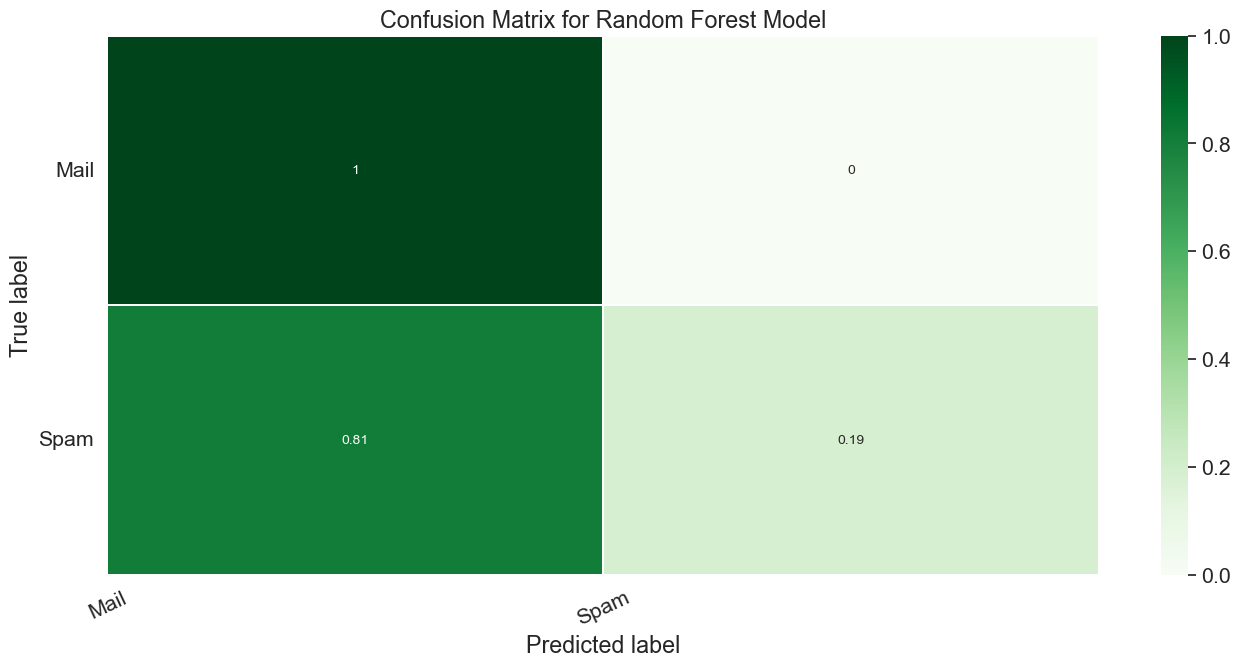

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Mail', 'Spam']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### on voit que le grid search détériore le modèle
attention aux paramètres pris dans le grid search
on voit aussi qu'il y à énormément de faux positif (donc des spam classer en mail) on vas essayer de corriger via le paramètre scorring = f1 du grid search

In [ ]:
model = RandomForestClassifier()
params = [{'n_estimators': [50,100,200],'max_features': ['auto', 'sqrt'],'max_depth' : [6,8,10,12],'criterion' :['gini', 'entropy']}]
GSCV = GridSearchCV(model,params,scoring="f1")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model2 = GSCV.best_estimator_

In [ ]:
best_model2

RandomForestClassifier(max_depth=12, max_features='sqrt')

In [ ]:
y_pred_test = best_model2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8446771378708552

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[856,   0],
       [178, 112]], dtype=int64)

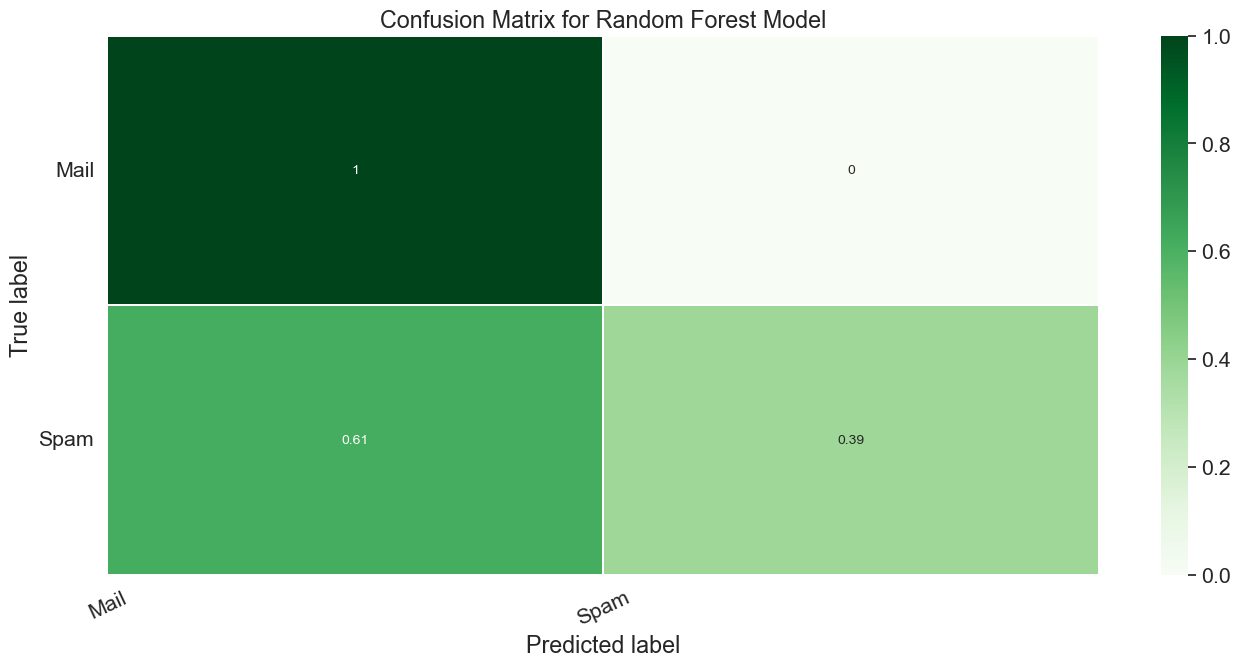

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Mail', 'Spam']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Diminution des faux positifs mais modèle toujours inférieur à celui par défaut.

### Donc notre grid search est mal paramètrer attention à son utilisation